## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_credit = pd.read_csv(r'rawdata\credit_final.csv')
df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


## Dataset에 대한 정보 및 대략적인 분포 확인

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [4]:
df_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


# 모델 학습에 사용할 x값(예측변수) 설정

In [5]:
x = df_credit.iloc[:, 1:21]
x

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,2,2,3,1,4,1,21,2,1,1,2,2,1,1
996,1,24,2,4,2303,1,4,4,3,2,1,1,45,2,2,1,3,1,1,1
997,3,21,3,4,12680,4,4,4,3,1,4,4,30,2,3,1,4,1,2,1
998,2,12,2,3,6468,4,1,2,3,1,1,4,52,2,2,1,4,1,2,1


In [6]:
y = df_credit.iloc[:, 0]
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: credit.rating, Length: 1000, dtype: int64

# k-means 모델 생성 및 군집화 수행
- `sklearn.cluster.KMeans()`  - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- Attributes : `cluster_centers_` : 클러스터 중심의 좌표
- Attributes : `labels_` : 각 지점의 label
- Attributes : `inertia_` : sample과 그 sample로부터 가장 가까운 클러스터의 중심까지 거리의 제곱 합. 즉, 오차제곱합. 군집 내의 분산을 의미함. 
- Attributes : `n_iter_` : 반복 실행 횟수

In [7]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

# n_clusters : int, default=8

# init : k-means++ : 수렴 속도를 높이기 위해 스마트 방식으로 k-mean 군집화를 위한 초기 군집 중심을 선택
#        random : n_clusters초기 중심에 대한 데이터에서 무작위로 관측값(행)을 선택

# max_iter: int, default=300. 단일 실행에 대한 k평균 알고리즘의 최대 반복 횟수

def kmeans(k):
    cluster_kmeans = KMeans( n_clusters = k,
                             random_state = 0 )
    return cluster_kmeans

## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택

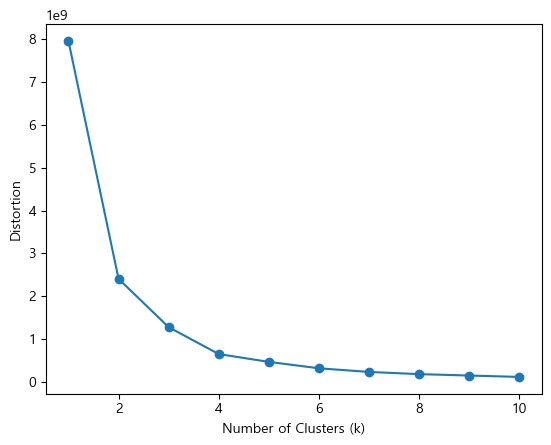

In [8]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for k in range(1,11):
    model_kmeans = kmeans(k).fit(x)
    inertia.append(model_kmeans.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 선정된 k값 모델로 군집화 수행 및 결과 확인

In [9]:
# k를 2개로 설정하고 군집 모델 학습
model_kmeans = kmeans(2).fit(x)

# 각각의 클러스터의 중심 확인
print('< centers >')
print(model_kmeans.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model_kmeans.labels_)

< centers >
[[2.19588875e+00 1.79709794e+01 2.28899637e+00 3.01209190e+00
  2.19329383e+03 1.83434099e+00 2.43288996e+00 3.07496977e+00
  2.35066505e+00 1.09431681e+00 2.83555018e+00 2.22974607e+00
  3.52877872e+01 1.82708585e+00 1.89600967e+00 1.35308343e+00
  2.83555018e+00 1.15235792e+00 1.35429262e+00 1.03990326e+00]
 [2.12138728e+00 3.49190751e+01 2.30635838e+00 2.73988439e+00
  8.42424277e+03 2.06358382e+00 2.50867052e+00 2.48554913e+00
  2.47398844e+00 1.08670520e+00 2.89017341e+00 2.97109827e+00
  3.67572254e+01 1.75144509e+00 2.08092486e+00 1.43352601e+00
  3.23121387e+00 1.16763006e+00 1.64161850e+00 1.02312139e+00]]

< labels >
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 

In [10]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result = df_credit.copy()

df_result['km_cluster'] = model_kmeans.labels_

display( df_result.groupby('credit.rating').count() )

display( df_result.groupby('km_cluster').count() )

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,...,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,km_cluster
credit.rating,,,,,,,,,,,,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
1,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700


,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,827,827,827,827,827,827,827,827,827,827,...,827,827,827,827,827,827,827,827,827,827
1,173,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173


In [11]:
df_result['km_cluster'] = df_result['km_cluster'].apply( lambda x: 1 if x == 0 else 0 )

df_result

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,km_cluster
0,1,1,18,3,2,1049,1,1,4,1,...,2,21,2,1,1,3,1,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,1,36,2,1,2,3,2,1,1,1
2,1,2,12,2,4,841,2,3,2,1,...,1,23,2,1,1,2,1,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,1,39,2,1,2,2,2,1,2,1
4,1,1,12,3,4,2171,1,2,4,3,...,2,38,1,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,1,21,2,1,1,2,2,1,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,45,2,2,1,3,1,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,30,2,3,1,4,1,2,1,0
998,0,2,12,2,3,6468,4,1,2,3,...,4,52,2,2,1,4,1,2,1,0


In [12]:
display( df_result.groupby('credit.rating').count() )

display( df_result.groupby('km_cluster').count() )

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,...,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,km_cluster
credit.rating,,,,,,,,,,,,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
1,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700


,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,173,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
1,827,827,827,827,827,827,827,827,827,827,...,827,827,827,827,827,827,827,827,827,827


# 내부 평가 ( Silhouette Coefficient )
- 개별 데이터 각각의 실루엣 계수: `sklearn.metrics.silhouette_samples()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

- 전체 데이터의 평균 실루엣 계수: `sklearn.metrics.silhouette_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## 개별 데이터 각각의 실루엣 계수 산출

In [13]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x, model_kmeans.labels_ )

# df_result에 각 행에 대한 실루엣 계수 컬럼 추가
df_result['silhouette_coeff'] = score_samples

# 컬럼 순서 재조정
df_result = df_result[ ['credit.rating', 'km_cluster',
       'silhouette_coeff', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'] ]
df_result

,credit.rating,km_cluster,silhouette_coeff,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,0.832131,1,18,3,2,1049,1,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,0.794256,1,9,3,4,2799,1,2,...,2,1,36,2,1,2,3,2,1,1
2,1,1,0.816064,2,12,2,4,841,2,3,...,4,1,23,2,1,1,2,1,1,1
3,1,1,0.846153,1,12,3,4,2122,1,2,...,2,1,39,2,1,2,2,2,1,2
4,1,1,0.844009,1,12,3,4,2171,1,2,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0.850781,1,24,2,3,1987,1,2,...,4,1,21,2,1,1,2,2,1,1
996,0,1,0.837069,1,24,2,4,2303,1,4,...,1,1,45,2,2,1,3,1,1,1
997,0,0,0.556309,3,21,3,4,12680,4,4,...,4,4,30,2,3,1,4,1,2,1
998,0,0,0.478008,2,12,2,3,6468,4,1,...,1,4,52,2,2,1,4,1,2,1


In [14]:
# 군집별 평균 실루엣 계수
group_silhouette = df_result.groupby('km_cluster')['silhouette_coeff'].mean()

print('< 군집별 평균 실루엣 계수 >\n', group_silhouette)

< 군집별 평균 실루엣 계수 >
 km_cluster
0    0.518294
1    0.764897
Name: silhouette_coeff, dtype: float64


## 평균 실루엣 계수 산출

In [15]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x, model_kmeans.labels_ )

print( '전체 평균 실루엣 계수: {0:.4f}'.format(average_score) )
print()

전체 평균 실루엣 계수: 0.7222



In [16]:
df_result['silhouette_coeff'].mean()

0.7222350314220556

## k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score by k >

k = 2 :  0.722235031422056
k = 3 :  0.6478629081815093
k = 4 :  0.611943922961797
k = 5 :  0.5822338446263936
k = 6 :  0.5772809187050438



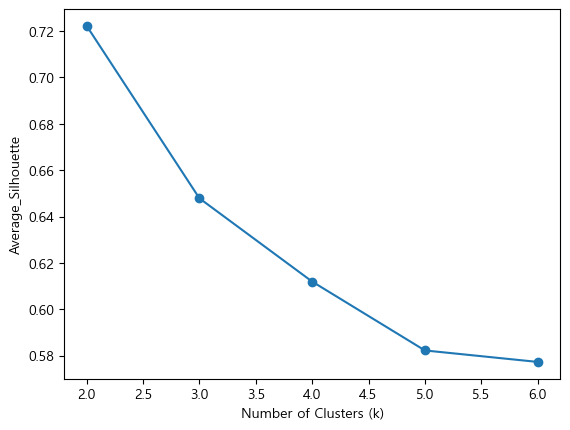

In [17]:
def silhouette_avg_k(a,b):
    avg_silhouette = list()
    print('< Average_Silhouette_Score by k >')
    print()
    
    i = 0
    for i in range(a,b):
        model_kmeans = kmeans(i).fit(x)
        
        average_score = silhouette_score( x, model_kmeans.labels_ )
        print( 'k =',i,': ', average_score )
        
        avg_silhouette.append(average_score)
    
    print()
    plt.plot(range(a,b), avg_silhouette, '-o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average_Silhouette')
    plt.show()

    
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정
silhouette_avg_k(2,7)

In [18]:
def silhouette_avg_vs_group(a,b):
    print('< Average_Silhouette_Score >')
    print()
    
    i = 0
    for i in range(a,b):
        model_kmeans = kmeans(i).fit(x)
        
        score_samples = silhouette_samples( x, model_kmeans.labels_ )
        average_score = silhouette_score( x, model_kmeans.labels_ )
        
        df = pd.DataFrame( { 'group' : model_kmeans.labels_,
                             'Coeff' : score_samples,
                             'Avg' : average_score } )
        df['Coeff-avg'] = df['Coeff'] - df['Avg']
        
        display( df.groupby(['Avg','group'])[ ['Coeff','Coeff-avg'] ].mean() )
        

# 군집별 실루엣 계수와 평균 실루엣 계수를 비교        
silhouette_avg_vs_group(2,7)

< Average_Silhouette_Score >



Coeff  Coeff-avg
Avg      group                     
0.722235 0      0.764897   0.042662
         1      0.518294  -0.203941

Coeff  Coeff-avg
Avg      group                     
0.647863 0      0.707021   0.059158
         1      0.533567  -0.114296
         2      0.478112  -0.169751

Coeff  Coeff-avg
Avg      group                     
0.611944 0      0.668968   0.057024
         1      0.533059  -0.078885
         2      0.529897  -0.082047
         3      0.578047  -0.033896

Coeff  Coeff-avg
Avg      group                     
0.582234 0      0.510738  -0.071496
         1      0.530053  -0.052181
         2      0.487533  -0.094701
         3      0.665145   0.082911
         4      0.505696  -0.076537

Coeff  Coeff-avg
Avg      group                     
0.577281 0      0.565673  -0.011608
         1      0.671357   0.094076
         2      0.501446  -0.075835
         3      0.532533  -0.044748
         4      0.490381  -0.086900
         5      0.505675  -0.071606

## 클러스터별 평균 실루엣 계수의 시각화

In [19]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette_kmeans(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [20]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_multi_PCA(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

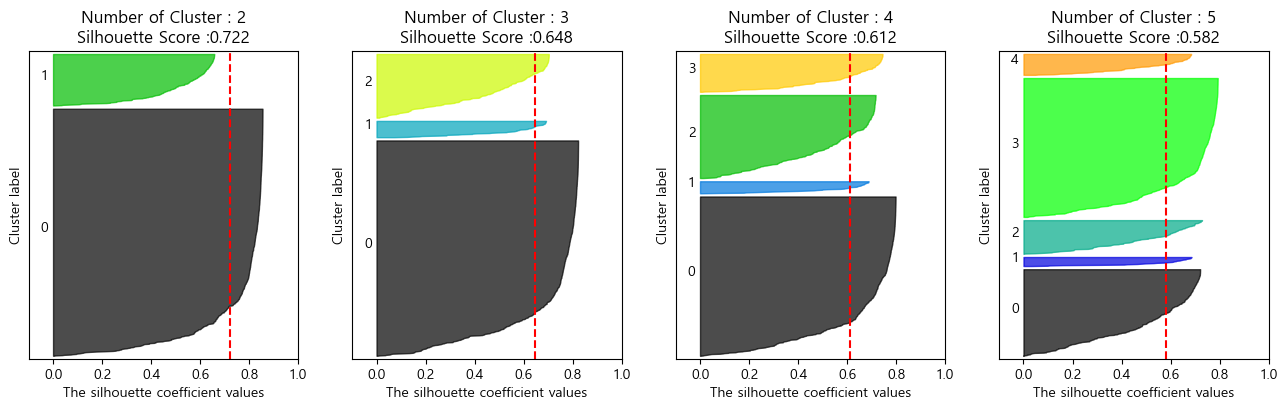

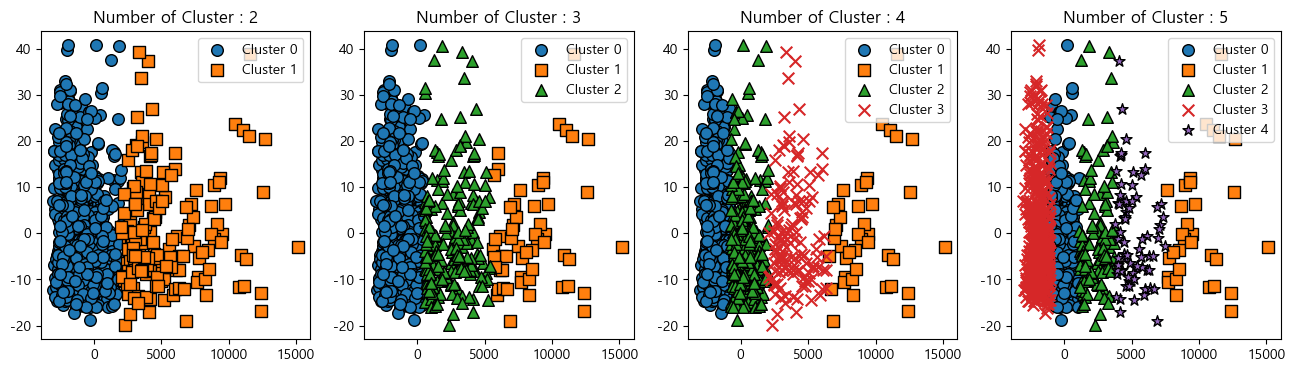

In [21]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette_kmeans( list(range(2,6)), x)
visualize_kmeans_multi_PCA( list(range(2,6)), x)

# 외부 평가

## 학습된 모델로 예측 수행

In [22]:
y_test = df_result.iloc[:,0]
y_pred = df_result.iloc[:,1]

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

,y_True,y_Predict,Pred_Result
0,1,1,True
1,1,1,True
2,1,1,True
3,1,1,True
4,1,1,True
5,1,1,True
6,1,1,True
7,1,1,True
8,1,1,True
9,1,1,True


## 평가

### Confusion Matrix
- `pandas.crosstab()`  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- 
- `sklearn.metrics.confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- 
- `sklearn.metrics.multilabel_confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
- 
- `sklearn.metrics.ConfusionMatrixDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [23]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1
pred,,
0,72,228
1,101,599


In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 72, 228],
       [101, 599]], dtype=int64)

In [25]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi

array([[[599, 101],
        [228,  72]],

       [[ 72, 228],
        [101, 599]]], dtype=int64)

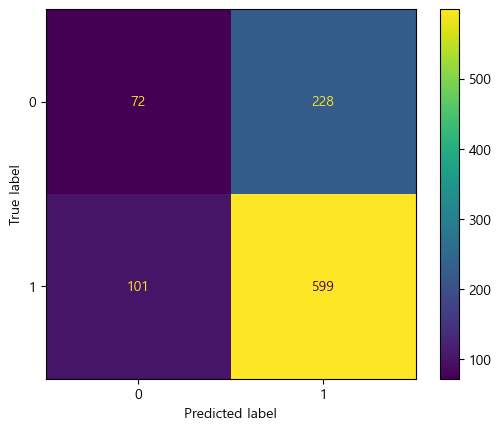

In [26]:
ConfusionMatrixDisplay( cm ).plot()

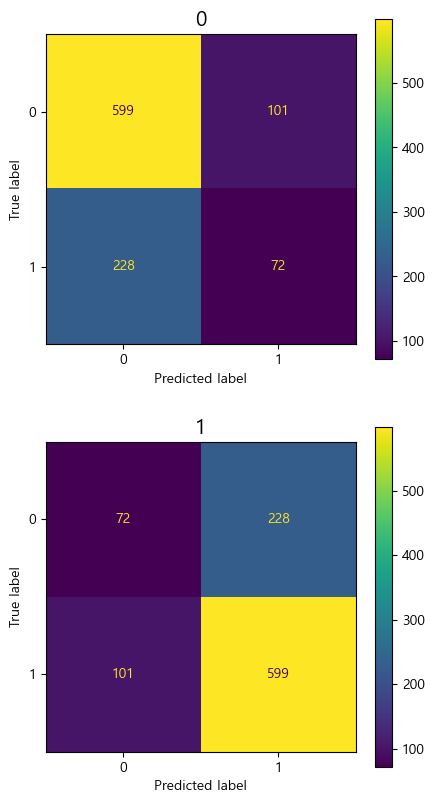

In [27]:
cm_0 = cm_multi[0]
cm_1 = cm_multi[1]

fig = plt.figure( figsize = (5, 15) )

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title( np.unique(y_test)[0], size = 15 )

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title( np.unique(y_test)[1], size = 15 )

ConfusionMatrixDisplay(cm_0).plot(ax=ax0)
ConfusionMatrixDisplay(cm_1).plot(ax=ax1)

### 분석 지표
- `sklearn.metrics.accuracy_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- `sklearn.metrics.classification_report()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [28]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.671

              precision    recall  f1-score   support

           0      0.416     0.240     0.304       300
           1      0.724     0.856     0.785       700

    accuracy                          0.671      1000
   macro avg      0.570     0.548     0.544      1000
weighted avg      0.632     0.671     0.641      1000




### ROC curve / AUC
- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 
- [참고] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Accuracy:  0.671
AUC:  0.5478571428571429



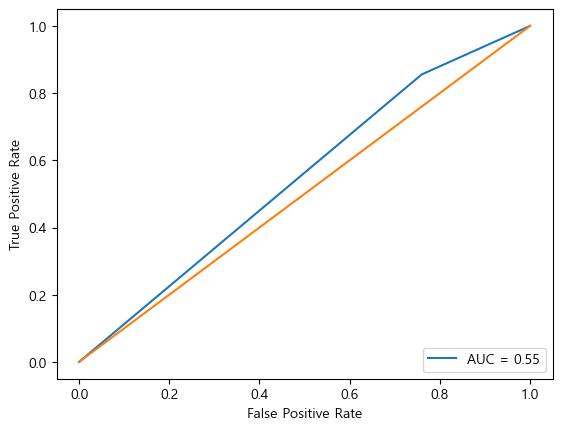

In [29]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test, y_pred )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_pred,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

# 모델 최적화

## Hyper parameter 최적화: `GridSearchCV`
- 교차 검증과 Hyper Parameter 튜닝을 한 번에 수행함.

- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- Attributes: `cv_results_`, `best_score_`, `best_params_`, `best_estimator_`

- Methods: `get_params()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params

### 파라미터 확인 및 평가 조건 설정

In [30]:
model = KMeans( random_state = 0 )

# 파라미터 목록 확인
list( model.get_params() )

['algorithm',
 'copy_x',
 'init',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_jobs',
 'precompute_distances',
 'random_state',
 'tol',
 'verbose']

In [31]:
# 평가할 파라미터 split 조건 설정

params = { 'n_clusters': [ 2 ],
           'init': ['k-means++', 'random'],
           'max_iter' : [ 300, 500, 800, 1000 ],
           'algorithm' : ['auto', 'full', 'elkan'] }

grid = GridSearchCV( model,
                     param_grid = params,
                     cv = 10,
                     scoring = 'accuracy',
                     refit = True,
                     n_jobs = -1 )



In [32]:
y2 = y.apply(lambda x: 1 if x ==0 else 0)
y2

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: credit.rating, Length: 1000, dtype: int64

In [33]:
# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y2 )

GridSearchCV(cv=10, estimator=KMeans(random_state=0), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [300, 500, 800, 1000], 'n_clusters': [2]},
             scoring='accuracy')

### 최적의 파라미터 결과 확인

In [34]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      24 non-null     float64
 1   std_fit_time       24 non-null     float64
 2   mean_score_time    24 non-null     float64
 3   std_score_time     24 non-null     float64
 4   param_algorithm    24 non-null     object 
 5   param_init         24 non-null     object 
 6   param_max_iter     24 non-null     object 
 7   param_n_clusters   24 non-null     object 
 8   params             24 non-null     object 
 9   split0_test_score  24 non-null     float64
 10  split1_test_score  24 non-null     float64
 11  split2_test_score  24 non-null     float64
 12  split3_test_score  24 non-null     float64
 13  split4_test_score  24 non-null     float64
 14  split5_test_score  24 non-null     float64
 15  split6_test_score  24 non-null     float64
 16  split7_test_score  24 non-nu

In [35]:
# pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
# pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score','std_test_score', 'rank_test_score'] ].sort_values(['rank_test_score']).head(30)

,params,mean_test_score,std_test_score,rank_test_score
0,"{'algorithm': 'auto', 'init': 'k-means++', 'ma...",0.615,0.273615,1
19,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",0.615,0.273615,1
18,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",0.615,0.273615,1
17,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",0.615,0.273615,1
16,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",0.615,0.273615,1
10,"{'algorithm': 'full', 'init': 'k-means++', 'ma...",0.615,0.273615,1
9,"{'algorithm': 'full', 'init': 'k-means++', 'ma...",0.615,0.273615,1
8,"{'algorithm': 'full', 'init': 'k-means++', 'ma...",0.615,0.273615,1
11,"{'algorithm': 'full', 'init': 'k-means++', 'ma...",0.615,0.273615,1
3,"{'algorithm': 'auto', 'init': 'k-means++', 'ma...",0.615,0.273615,1


### 최적의 파라미터 추출

In [36]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))

최고 Score:  0.615
최적 Parameters:  {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2}
최적 Estimators:  KMeans(n_clusters=2, random_state=0)
